> 데이터가 깔끔하지 않을 때를 위한 자잘한 팁 (missing, filtering, assign, 행변환)

# 1. 강의영상

# 2. Imports

In [2]:
import numpy as np
import pandas as pd

# 3. Pandas: 기본기능

## A. 열의 이름 변경

`-` 방법1: `df.columns`에 대입

In [6]:
df = pd.DataFrame(np.random.randn(3,2))
df.columns 

RangeIndex(start=0, stop=2, step=1)

In [7]:
list(df.columns) # 컬럼명이 0,1로 저장되어 있음.

[0, 1]

In [8]:
df.columns = ['A','B'] # 컬럼이름 바꾸기.

In [9]:
df

,A,B
0,0.148797,0.508274
1,2.450131,0.077788
2,-0.089712,0.720153


`-` 방법2: `df.set_axis()`

In [10]:
df = pd.DataFrame(np.random.randn(5,3))
df

,0,1,2
0,-2.295180,0.196262,0.260348
1,0.933123,-1.304135,1.446940
2,0.642722,-1.138573,0.873878
3,-0.658560,0.369092,0.063098
4,0.017730,-1.110979,0.917571


In [11]:
df.set_axis(['A','B','C'],axis=1)

,A,B,C
0,-2.295180,0.196262,0.260348
1,0.933123,-1.304135,1.446940
2,0.642722,-1.138573,0.873878
3,-0.658560,0.369092,0.063098
4,0.017730,-1.110979,0.917571


In [14]:
df = pd.DataFrame(np.random.randn(5,3))
df

,0,1,2
0,-1.104416,-0.128439,0.269068
1,-1.663507,-0.083289,-0.057443
2,-0.921260,-0.534263,-0.685721
3,-1.867316,-0.438948,-0.104675
4,-1.350895,-1.563338,-0.680217


In [15]:
df.set_axis(['A','B','C','D','E'],axis=0)

,0,1,2
A,-1.104416,-0.128439,0.269068
B,-1.663507,-0.083289,-0.057443
C,-0.921260,-0.534263,-0.685721
D,-1.867316,-0.438948,-0.104675
E,-1.350895,-1.563338,-0.680217


`-` 방법3: `df.rename()`

In [20]:
df = pd.DataFrame(np.random.randn(5,3))
df

,0,1,2
0,0.217076,1.089656,-0.384690
1,1.677108,-1.263818,2.244100
2,-1.841508,-1.156893,-0.738780
3,0.426959,-1.423985,-1.193719
4,1.125859,-0.799723,0.454321


In [21]:
df.rename({0:'AA', 1:'BB'},axis=1)
# df.rename(columns={0:'AA', 1:'BB'}) ## 위와 동일한 코드

,AA,BB,2
0,0.217076,1.089656,-0.384690
1,1.677108,-1.263818,2.244100
2,-1.841508,-1.156893,-0.738780
3,0.426959,-1.423985,-1.193719
4,1.125859,-0.799723,0.454321


## B. 행의 이름 변경

`-` 방법1: `df.index`에 대입

In [22]:
df = pd.DataFrame(np.random.randn(2,3))
df

,0,1,2
0,1.033253,1.768416,1.413502
1,0.615272,1.021584,0.069085


- row이름을 index

In [23]:
df.index = ['hynn','iu']
df

,0,1,2
hynn,1.033253,1.768416,1.413502
iu,0.615272,1.021584,0.069085


`-` 방법2: `df.set_axis()`

In [28]:
df = pd.DataFrame(np.random.randn(2,3))
df

,0,1,2
0,-2.130565,0.227919,1.023103
1,-0.405379,-0.368737,-1.174423


In [30]:
# df.set_axis(list('AB'))
df.set_axis(['A','B'], axis=0)

,0,1,2
A,-2.130565,0.227919,1.023103
B,-0.405379,-0.368737,-1.174423


`-` 방법3: `df.rename()`

In [31]:
df = pd.DataFrame(np.random.randn(2,3))
df

,0,1,2
0,0.683712,0.259077,-1.600270
1,-0.283836,-0.057625,-0.708813


In [32]:
df.rename({1:'guebin'})

,0,1,2
0,0.683712,0.259077,-1.600270
guebin,-0.283836,-0.057625,-0.708813


- 데이터 프레임의 row name을 바꾸는 경우는 거의 없다... (Timeseries일 경우를 제외하고는?)

`-` 방법4: 임의의 열을 행이름으로 지정!

In [34]:
df = pd.DataFrame({'id':[43052,43053], 'X1':[1,2],'X2':[2,3]})
df

,id,X1,X2
0,43052,1,2
1,43053,2,3


In [40]:
df = pd.DataFrame({'id':['2023-43052', '2023-43053'], 'hour':[3,2], 'height':[176,172]})
df

,id,hour,height
0,2023-43052,3,176
1,2023-43053,2,172


In [42]:
df.set_index('id') # column에 있던 id가 row index로..

,hour,height
id,,
2023-43052,3,176
2023-43053,2,172


## `#` A~B에 대한 연습문제

`-` 데이터 load

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
df.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN


`# 예제1`: 열의 이름 출력하고, 열의 이름중 공백(``)이 있을 경우
언더바(`_`) 로 바꾸자.

컬럼출력

In [48]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Release Clause', 'Kit Number', 'Best Overall Rating'],
      dtype='object')

1.  `df.columns`에 직접대입

In [49]:
new_columns = [s.replace(' ','_') for s in df.columns]  
# df.columns = new_columns

In [50]:
new_columns

['ID',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club_Logo',
 'Value',
 'Wage',
 'Special',
 'Preferred_Foot',
 'International_Reputation',
 'Weak_Foot',
 'Skill_Moves',
 'Work_Rate',
 'Body_Type',
 'Real_Face',
 'Position',
 'Joined',
 'Loaned_From',
 'Contract_Valid_Until',
 'Height',
 'Weight',
 'Release_Clause',
 'Kit_Number',
 'Best_Overall_Rating']

1.  `set_axis()` 이용

In [51]:
new_columns = [s.replace(' ','_') for s in df.columns]  
df.set_axis(new_columns,axis=1)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,...,Real_Face,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Release_Clause,Kit_Number,Best_Overall_Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN


1.  `rename()` 이용 – 안중요함

In [56]:
dct = {k:k.replace(' ', '_') for k in df.columns} # 딕셔너리 컴프리헨션
dct

{'ID': 'ID',
 'Name': 'Name',
 'Age': 'Age',
 'Photo': 'Photo',
 'Nationality': 'Nationality',
 'Flag': 'Flag',
 'Overall': 'Overall',
 'Potential': 'Potential',
 'Club': 'Club',
 'Club Logo': 'Club_Logo',
 'Value': 'Value',
 'Wage': 'Wage',
 'Special': 'Special',
 'Preferred Foot': 'Preferred_Foot',
 'International Reputation': 'International_Reputation',
 'Weak Foot': 'Weak_Foot',
 'Skill Moves': 'Skill_Moves',
 'Work Rate': 'Work_Rate',
 'Body Type': 'Body_Type',
 'Real Face': 'Real_Face',
 'Position': 'Position',
 'Joined': 'Joined',
 'Loaned From': 'Loaned_From',
 'Contract Valid Until': 'Contract_Valid_Until',
 'Height': 'Height',
 'Weight': 'Weight',
 'Release Clause': 'Release_Clause',
 'Kit Number': 'Kit_Number',
 'Best Overall Rating': 'Best_Overall_Rating'}

In [57]:
dct = {k:k.replace(' ','_') for k in df.columns}
df.rename(dct, axis=1)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,...,Real_Face,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Release_Clause,Kit_Number,Best_Overall_Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN


`#`

`예제2`: ID를 row-index로 지정하라.

1.  직접지정

In [59]:
# df.index = df.ID

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
ID,,,,,,,,,,,,,,,,,,,,,
209658,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
212198,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
224334,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
192985,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
224232,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [348]:
# df.index = df.ID

1.  `set_axis()`

In [63]:
df.set_axis(df.ID, axis=0)[:3]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
ID,,,,,,,,,,,,,,,,,,,,,
209658,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
212198,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
224334,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN


1.  `rename()` – 안중요함

In [69]:
{idx:ID for idx, ID in zip(df[:10].index, df[:10].ID)}

{0: 209658,
 1: 212198,
 2: 224334,
 3: 192985,
 4: 224232,
 5: 212622,
 6: 197445,
 7: 187961,
 8: 208333,
 9: 210514}

In [70]:
dct = {k:v for k,v in zip(df.index,df.ID)}
df.rename(dct)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
209658,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
212198,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
224334,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
192985,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
224232,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269526,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
267946,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
270567,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
256624,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN


1.  `set_index()`

In [71]:
df.set_index('ID')

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
ID,,,,,,,,,,,,,,,,,,,,,
209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,€91M,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,€78.5M,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,€46.5M,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,€107.5M,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,€89.5M,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,€100K,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,€100K,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,€70K,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN


`#`

## C. `pd.T`

`-` `df.T`를 이용하여 데이터를 살피면 편리함

In [73]:
df.T.iloc[:,:3]

,0,1,2
ID,209658,212198,224334
Name,L. Goretzka,Bruno Fernandes,M. Acuña
Age,27,27,30
Photo,https://cdn.sofifa.net/players/209/658/23_60.png,https://cdn.sofifa.net/players/212/198/23_60.png,https://cdn.sofifa.net/players/224/334/23_60.png
Nationality,Germany,Portugal,Argentina
Flag,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pt.png,https://cdn.sofifa.net/flags/ar.png
Overall,87,86,85
Potential,88,87,85
Club,FC Bayern München,Manchester United,Sevilla FC
Club Logo,https://cdn.sofifa.net/teams/21/30.png,https://cdn.sofifa.net/teams/11/30.png,https://cdn.sofifa.net/teams/481/30.png


`-` 출력옵션 조정

In [74]:
pd.options.display.max_rows = 10
display(df.T.iloc[:,:3])
pd.reset_option("display.max_rows")

,0,1,2
ID,209658,212198,224334
Name,L. Goretzka,Bruno Fernandes,M. Acuña
Age,27,27,30
Photo,https://cdn.sofifa.net/players/209/658/23_60.png,https://cdn.sofifa.net/players/212/198/23_60.png,https://cdn.sofifa.net/players/224/334/23_60.png
Nationality,Germany,Portugal,Argentina
...,...,...,...
Height,189cm,179cm,172cm
Weight,82kg,69kg,69kg
Release Clause,€157M,€155M,€97.7M
Kit Number,8.0,8.0,19.0


-   이 예제에서는 줄이는 옵션을 사용했지만 보통은 늘려서 사용함

## D. `df.dtypes`, `s.dtype`

`-` `df.dtypes`

In [75]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Release Clause               object
Kit Number                  

- "object는 거의 string이구나" 라고 생각해도 무방.

`-` `s.dtype`

In [84]:
df.Name.dtype # 'O': object를 의미.

dtype('O')

In [85]:
df.Age.dtype

dtype('int64')

In [86]:
df['International Reputation'].dtype

dtype('float64')

`-` `==`를 이용한 자료형 체크

In [89]:
df.Name.dtype == np.object_

True

In [90]:
df.Age.dtype == np.int64

True

In [91]:
df['International Reputation'].dtype == np.float64

True

`# 예제`: `df`에서 `int64` 자료형만 출력

`-` (풀이1)

In [92]:
pd.Series(list(df.dtypes))

0       int64
1      object
2       int64
3      object
4      object
5      object
6       int64
7       int64
8      object
9      object
10     object
11     object
12      int64
13     object
14    float64
15    float64
16    float64
17     object
18     object
19     object
20     object
21     object
22     object
23     object
24     object
25     object
26     object
27    float64
28     object
dtype: object

In [93]:
df.iloc[:,[0,2,6,7,12]]

,ID,Age,Overall,Potential,Special
0,209658,27,87,88,2312
1,212198,27,86,87,2305
2,224334,30,85,85,2303
3,192985,31,91,91,2303
4,224232,25,86,89,2296
...,...,...,...,...,...
17655,269526,19,48,61,762
17656,267946,17,48,64,761
17657,270567,25,51,56,759
17658,256624,18,50,65,758


`-` (풀이2)

In [98]:
[o == np.int64 for o in df.dtypes]

[True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [99]:
df.loc[:,[o == np.int64 for o in df.dtypes]]

,ID,Age,Overall,Potential,Special
0,209658,27,87,88,2312
1,212198,27,86,87,2305
2,224334,30,85,85,2303
3,192985,31,91,91,2303
4,224232,25,86,89,2296
...,...,...,...,...,...
17655,269526,19,48,61,762
17656,267946,17,48,64,761
17657,270567,25,51,56,759
17658,256624,18,50,65,758


## E. `df.sort_values()`

`-` 예시1: 나이가 어린 순서대로 정렬

In [101]:
df.sort_values(by='Age')

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
17636,263636,22 D. Oncescu,15,https://cdn.sofifa.net/players/263/636/22_60.png,Romania,https://cdn.sofifa.net/flags/ro.png,50,72,FC Dinamo 1948 Bucureşti,https://cdn.sofifa.net/teams/100757/30.png,...,No,"<span class=""pos pos29"">RES","Jun 1, 2021",NaN,2025,190cm,77kg,€306K,34.0,NaN
13712,271072,E. Topcu,16,https://cdn.sofifa.net/players/271/072/23_60.png,Republic of Ireland,https://cdn.sofifa.net/flags/ie.png,48,58,Drogheda United,https://cdn.sofifa.net/teams/1572/30.png,...,No,"<span class=""pos pos29"">RES","Jul 8, 2022",NaN,2022,183cm,65kg,€175K,20.0,NaN
13078,259442,22 R. van den Berg,16,https://cdn.sofifa.net/players/259/442/22_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,60,81,PEC Zwolle,https://cdn.sofifa.net/teams/1914/30.png,...,No,"<span class=""pos pos29"">RES","May 24, 2020",NaN,2024,190cm,73kg,€1.8M,33.0,NaN
11257,266205,22 Y. Koré,16,https://cdn.sofifa.net/players/266/205/22_60.png,France,https://cdn.sofifa.net/flags/fr.png,59,74,Paris FC,https://cdn.sofifa.net/teams/111817/30.png,...,No,"<span class=""pos pos29"">RES","Aug 11, 2022",NaN,2025,187cm,75kg,€1.1M,34.0,NaN
11278,261873,21 H. Kumagai,16,https://cdn.sofifa.net/players/261/873/21_60.png,Japan,https://cdn.sofifa.net/flags/jp.png,52,70,Vegalta Sendai,https://cdn.sofifa.net/teams/112836/30.png,...,No,"<span class=""pos pos29"">RES","Apr 16, 2021",NaN,2023,174cm,64kg,€375K,48.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16311,254196,21 L. Fernández,42,https://cdn.sofifa.net/players/254/196/21_60.png,Colombia,https://cdn.sofifa.net/flags/co.png,61,61,Sociedad Deportiva Aucas,https://cdn.sofifa.net/teams/110987/30.png,...,No,"<span class=""pos pos28"">SUB","Jan 29, 2018",NaN,2024,187cm,82kg,€75K,1.0,NaN
16036,216692,S. Torrico,42,https://cdn.sofifa.net/players/216/692/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,72,72,San Lorenzo de Almagro,https://cdn.sofifa.net/teams/1013/30.png,...,No,"<span class=""pos pos0"">GK","Apr 25, 2013",NaN,2022,183cm,84kg,€375K,12.0,NaN
17257,645,17 D. Andersson,43,https://cdn.sofifa.net/players/000/645/17_60.png,Sweden,https://cdn.sofifa.net/flags/se.png,57,57,Helsingborgs IF,https://cdn.sofifa.net/teams/432/30.png,...,No,"<span class=""pos pos28"">SUB","Apr 21, 2016",NaN,2022,187cm,85kg,NaN,39.0,NaN
15375,1179,G. Buffon,44,https://cdn.sofifa.net/players/001/179/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,79,79,Parma,https://cdn.sofifa.net/teams/50/30.png,...,Yes,"<span class=""pos pos0"">GK","Jul 1, 2021",NaN,2024,192cm,92kg,€3M,1.0,NaN


`-` 예시2: 나이가 많은 순서대로 정렬

In [102]:
df.sort_values('Age',ascending=False)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
15272,254704,22 K. Miura,54,https://cdn.sofifa.net/players/254/704/22_60.png,Japan,https://cdn.sofifa.net/flags/jp.png,56,56,Yokohama FC,https://cdn.sofifa.net/teams/113197/30.png,...,No,"<span class=""pos pos29"">RES","Jul 1, 2005",NaN,2022,177cm,72kg,NaN,11.0,NaN
15375,1179,G. Buffon,44,https://cdn.sofifa.net/players/001/179/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,79,79,Parma,https://cdn.sofifa.net/teams/50/30.png,...,Yes,"<span class=""pos pos0"">GK","Jul 1, 2021",NaN,2024,192cm,92kg,€3M,1.0,NaN
17257,645,17 D. Andersson,43,https://cdn.sofifa.net/players/000/645/17_60.png,Sweden,https://cdn.sofifa.net/flags/se.png,57,57,Helsingborgs IF,https://cdn.sofifa.net/teams/432/30.png,...,No,"<span class=""pos pos28"">SUB","Apr 21, 2016",NaN,2022,187cm,85kg,NaN,39.0,NaN
16036,216692,S. Torrico,42,https://cdn.sofifa.net/players/216/692/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,72,72,San Lorenzo de Almagro,https://cdn.sofifa.net/teams/1013/30.png,...,No,"<span class=""pos pos0"">GK","Apr 25, 2013",NaN,2022,183cm,84kg,€375K,12.0,NaN
16311,254196,21 L. Fernández,42,https://cdn.sofifa.net/players/254/196/21_60.png,Colombia,https://cdn.sofifa.net/flags/co.png,61,61,Sociedad Deportiva Aucas,https://cdn.sofifa.net/teams/110987/30.png,...,No,"<span class=""pos pos28"">SUB","Jan 29, 2018",NaN,2024,187cm,82kg,€75K,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17360,261023,21 H. Broun,16,https://cdn.sofifa.net/players/261/023/21_60.png,Scotland,https://cdn.sofifa.net/flags/gb-sct.png,52,72,Kilmarnock,https://cdn.sofifa.net/teams/82/30.png,...,No,"<span class=""pos pos29"">RES","Sep 17, 2020",NaN,2022,182cm,70kg,€523K,40.0,NaN
15536,263639,22 M. Pavel,16,https://cdn.sofifa.net/players/263/639/22_60.png,Romania,https://cdn.sofifa.net/flags/ro.png,51,69,FC Dinamo 1948 Bucureşti,https://cdn.sofifa.net/teams/100757/30.png,...,No,"<span class=""pos pos29"">RES","Jul 1, 2021",NaN,2023,178cm,66kg,€277K,77.0,NaN
11398,256405,21 W. Essanoussi,16,https://cdn.sofifa.net/players/256/405/21_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,59,75,VVV-Venlo,https://cdn.sofifa.net/teams/100651/30.png,...,No,"<span class=""pos pos29"">RES","Jul 1, 2019",NaN,2022,178cm,70kg,€1.1M,24.0,NaN
15030,270594,T. Walczak,16,https://cdn.sofifa.net/players/270/594/23_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,54,68,Wisła Płock,https://cdn.sofifa.net/teams/1569/30.png,...,No,"<span class=""pos pos29"">RES","Sep 7, 2021",NaN,2023,191cm,88kg,€494K,99.0,NaN


`-` 예시3: 능력치가 좋은 순서대로 정렬

In [104]:
df.sort_values('Overall',ascending=False)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
41,188545,R. Lewandowski,33,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,91,91,FC Barcelona,https://cdn.sofifa.net/teams/241/30.png,...,Yes,"<span class=""pos pos25"">ST","Jul 18, 2022",NaN,2025,185cm,81kg,€172.2M,9.0,NaN
124,165153,K. Benzema,34,https://cdn.sofifa.net/players/165/153/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,91,91,Real Madrid CF,https://cdn.sofifa.net/teams/243/30.png,...,Yes,"<span class=""pos pos21"">CF","Jul 9, 2009",NaN,2023,185cm,81kg,€131.2M,9.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
56,158023,L. Messi,35,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,91,91,Paris Saint-Germain,https://cdn.sofifa.net/teams/73/30.png,...,Yes,"<span class=""pos pos23"">RW","Aug 10, 2021",NaN,2023,169cm,67kg,€99.9M,30.0,NaN
75,231747,K. Mbappé,23,https://cdn.sofifa.net/players/231/747/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,91,95,Paris Saint-Germain,https://cdn.sofifa.net/teams/73/30.png,...,Yes,"<span class=""pos pos25"">ST","Jul 1, 2018",NaN,2025,182cm,73kg,€366.7M,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15513,266751,22 Jung Ho Yeon,20,https://cdn.sofifa.net/players/266/751/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,45,53,GwangJu FC,https://cdn.sofifa.net/teams/112258/30.png,...,No,"<span class=""pos pos29"">RES","Jan 20, 2022",NaN,2026,180cm,73kg,€145K,23.0,NaN
16215,268279,22 J. Looschen,24,https://cdn.sofifa.net/players/268/279/22_60.png,Germany,https://cdn.sofifa.net/flags/de.png,44,47,SV Meppen,https://cdn.sofifa.net/teams/110597/30.png,...,No,"<span class=""pos pos29"">RES","Mar 19, 2022",NaN,2026,178cm,78kg,€92K,42.0,NaN
16042,255283,20 Kim Yeong Geun,22,https://cdn.sofifa.net/players/255/283/20_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,44,49,Gyeongnam FC,https://cdn.sofifa.net/teams/111588/30.png,...,No,"<span class=""pos pos29"">RES","Jan 9, 2020",NaN,2020,174cm,71kg,€53K,43.0,NaN
14634,269038,22 Zhang Wenxuan,16,https://cdn.sofifa.net/players/269/038/22_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,44,59,Guangzhou FC,https://cdn.sofifa.net/teams/111839/30.png,...,No,"<span class=""pos pos29"">RES","May 1, 2022",NaN,2022,175cm,70kg,€239K,29.0,NaN


## F. `df.info()`

각 컬럼에 들어있는 데이터 타입 혹은 missing에 대한 정보를 한꺼번에 알고싶다면 `df.info()` 를 사용하면 된다.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

In [112]:
df['Best Overall Rating']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
17655    NaN
17656    NaN
17657    NaN
17658    NaN
17659    NaN
Name: Best Overall Rating, Length: 17660, dtype: object

## G. `df.isna()`

`-` 예시1: 열별로 결측치 count

In [109]:
df.isna() # 결측치가 있으면 True, 그렇지 않으면 False

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
17656,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
17657,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
17658,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [122]:
arr = np.array([[True, False], [True, False], [False, True]])
arr

array([[ True, False],
       [ True, False],
       [False,  True]])

In [123]:
arr.shape

(3, 2)

In [124]:
arr.sum(axis=0)

array([2, 1])

In [125]:
df.isna().sum(axis=0)
df.isna().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          211
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      38
Real Face                      38
Position                       35
Joined                       1098
Loaned From                 16966
Contract Valid Until          361
Height                          0
Weight                          0
Release Clause               1151
Kit Number                     35
Best Overall Rating         17639
dtype: int64

`-` 예시2: 결측치가 50% 이상인 열 출력

In [128]:
df.loc[:,(df.isna().sum() / len(df)) > 0.5]

,Loaned From,Best Overall Rating
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
17655,NaN,NaN
17656,NaN,NaN
17657,NaN,NaN
17658,NaN,NaN


## H. `df.drop()`

`-` 예시1: \[0,1,2,3\] 행을 drop

In [130]:
# df.drop([0,1,2,3])
df.drop([0,1,2,3],axis=0)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
5,212622,J. Kimmich,27,https://cdn.sofifa.net/players/212/622/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,89,90,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos9"">RDM","Jul 1, 2015",NaN,2025,177cm,75kg,€182M,6.0,NaN
6,197445,D. Alaba,30,https://cdn.sofifa.net/players/197/445/23_60.png,Austria,https://cdn.sofifa.net/flags/at.png,86,86,Real Madrid CF,https://cdn.sofifa.net/teams/243/30.png,...,Yes,"<span class=""pos pos6"">LCB","Jul 1, 2021",NaN,2026,180cm,78kg,€113.8M,4.0,NaN
7,187961,22 Paulinho,32,https://cdn.sofifa.net/players/187/961/22_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,83,83,Al Ahli,https://cdn.sofifa.net/teams/112387/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jul 22, 2021",NaN,2024,183cm,80kg,€48.5M,15.0,NaN
8,208333,E. Can,28,https://cdn.sofifa.net/players/208/333/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,82,82,Borussia Dortmund,https://cdn.sofifa.net/teams/22/30.png,...,Yes,"<span class=""pos pos28"">SUB","Feb 18, 2020",NaN,2024,186cm,86kg,€51.9M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN


`-` 예시2: \[‘Name’, ‘Age’\] 열을 drop

In [132]:
df.drop(['Name','Age'],axis=1)
# df.drop(columns=['Name','Age'])

,ID,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,€91M,€115K,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,€78.5M,€190K,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,€46.5M,€46K,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,€107.5M,€350K,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,€89.5M,€110K,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,€100K,€500,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,€100K,€500,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,€70K,€2K,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,€90K,€500,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN


## `#` G~H 에 대한 연습문제

`# 예제`: 결측치가 50퍼 이상인 열을 제외하라.

`-` (풀이1)

In [136]:
df.isna().mean(axis=0) > 0.5

ID                          False
Name                        False
Age                         False
Photo                       False
Nationality                 False
Flag                        False
Overall                     False
Potential                   False
Club                        False
Club Logo                   False
Value                       False
Wage                        False
Special                     False
Preferred Foot              False
International Reputation    False
Weak Foot                   False
Skill Moves                 False
Work Rate                   False
Body Type                   False
Real Face                   False
Position                    False
Joined                      False
Loaned From                  True
Contract Valid Until        False
Height                      False
Weight                      False
Release Clause              False
Kit Number                  False
Best Overall Rating          True
dtype: bool

In [138]:
df.drop(columns=['Loaned From','Best Overall Rating'])

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Kit Number
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",2026,189cm,82kg,€157M,8.0
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",2026,179cm,69kg,€155M,8.0
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",2024,172cm,69kg,€97.7M,19.0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",2025,181cm,70kg,€198.9M,17.0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",2026,172cm,68kg,€154.4M,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Apr 11, 2022",2027,190cm,78kg,€218K,35.0
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2022",2026,195cm,84kg,€188K,21.0
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jun 6, 2021",2023,190cm,82kg,€142K,12.0
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2020",2021,187cm,79kg,€214K,40.0


`-` (풀이2)

In [143]:
df.loc[:,df.isna().mean() < 0.5] # False인 것을 제외하고 선택!

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Kit Number
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",2026,189cm,82kg,€157M,8.0
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",2026,179cm,69kg,€155M,8.0
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",2024,172cm,69kg,€97.7M,19.0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",2025,181cm,70kg,€198.9M,17.0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",2026,172cm,68kg,€154.4M,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Apr 11, 2022",2027,190cm,78kg,€218K,35.0
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2022",2026,195cm,84kg,€188K,21.0
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jun 6, 2021",2023,190cm,82kg,€142K,12.0
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2020",2021,187cm,79kg,€214K,40.0


# 4. Pandas: missing

> numpy와 pandas에서의 missing이 좀 다르다.

## A. Numpy

`-` 발생: `np.nan`

In [144]:
np.nan

nan

In [145]:
[1,2,3,np.nan]

[1, 2, 3, nan]

In [146]:
arr = np.array([1,2,3,np.nan])
arr

array([ 1.,  2.,  3., nan])

`-` np.array에 nan이 있으면 연산결과도 nan

In [148]:
arr.mean()

nan

`-` type

In [149]:
type(np.nan) 

float

In [150]:
type(arr[0])

numpy.float64

In [151]:
type(arr[-1])

numpy.float64

## B. Pandas

> Pandas Sereis로 바꾸게 되면? NAN값을 빈칸으로 생각.

`-` 발생: np.nan, pd.NA

In [152]:
pd.Series([np.nan,1,2,3])

0    NaN
1    1.0
2    2.0
3    3.0
dtype: float64

In [153]:
pd.Series([pd.NA,1,2,3])

0    <NA>
1       1
2       2
3       3
dtype: object

`-` pd.Series에 `NaN` 혹은 `<NA>` 가 있다면 연산할때 제외함

In [155]:
pd.Series([np.nan,1,2,3]).mean()

2.0

In [156]:
pd.Series([pd.NA,1,2,3]).mean()

2.0

`-` type

In [161]:
s1 = pd.Series([np.nan,1,2,3])
type(s1[0])

numpy.float64

In [162]:
s2 = pd.Series([pd.NA,1,2,3])
type(s2[0])

pandas._libs.missing.NAType

- Pandas 내부적으로 숨겨져 있는데 NAType.

`-` 검출 ($\star$)

In [163]:
s1.isna()

0     True
1    False
2    False
3    False
dtype: bool

In [164]:
s2.isna()

0     True
1    False
2    False
3    False
dtype: bool

- `nan`도 missing, `na`도 missing 이라고 판단한다.

In [168]:
pd.isna(s1[0]), pd.isnull(s1[0])

(True, True)

In [169]:
pd.isna(s2[0]), pd.isnull(s2[0])

(True, True)

In [171]:
id(pd.isna), id(pd.isnull) # 같은함수 (같은주소에 있는 서로 다른 이름.)

(140118877856240, 140118877856240)

- 똑같은지 아닌지 의심스러우면 `id`로 확인하면 된다.

# 5. Pandas: query

> 조건에 맞는 sub dataframe을 뽑고싶을때 매우 유용하다.

In [172]:
ts = pd.DataFrame(np.random.normal(size=(20,4)),columns=list('ABCD'),index=pd.date_range('20221226',periods=20)).assign(E=['A']*10+['B']*10)
ts

,A,B,C,D,E
2022-12-26,-0.290124,-0.396444,0.560434,-1.443280,A
2022-12-27,1.138250,2.569641,0.684869,1.397645,A
2022-12-28,-0.402852,-0.342033,0.810158,0.289628,A
2022-12-29,-2.158452,-0.307801,-0.747125,1.191654,A
2022-12-30,-1.524006,0.157796,-1.288993,0.974777,A
2022-12-31,1.437765,-1.100252,0.062147,-0.642809,A
2023-01-01,2.897278,0.132532,1.248877,0.451774,A
2023-01-02,-1.651545,-1.972528,-0.944708,-0.372837,A
2023-01-03,-0.144459,-0.824311,-0.987235,0.073856,A
2023-01-04,1.611089,-1.187192,-0.247400,0.446779,A


## A. 기본 query

`-` 예시1: `A>0 and B<0`

In [173]:
ts.query('A>0 and B<0')

,A,B,C,D,E
2022-12-31,1.437765,-1.100252,0.062147,-0.642809,A
2023-01-04,1.611089,-1.187192,-0.247400,0.446779,A
2023-01-10,0.576171,-1.193324,-0.119947,-0.147450,B
2023-01-11,1.034063,-2.751738,-0.257993,-0.747487,B


`-` 예시2: `A<B<C`

In [174]:
ts.query('A<B<C')

,A,B,C,D,E
2022-12-28,-0.402852,-0.342033,0.810158,0.289628,A
2023-01-08,0.569372,0.652307,0.852527,0.590511,B


`-` 예시3: `(A+B)/2 > 0`

In [185]:
ts.query('(A+B)>0')

,A,B,C,D,E
2022-12-27,1.138250,2.569641,0.684869,1.397645,A
2022-12-31,1.437765,-1.100252,0.062147,-0.642809,A
2023-01-01,2.897278,0.132532,1.248877,0.451774,A
2023-01-04,1.611089,-1.187192,-0.247400,0.446779,A
2023-01-05,-0.440344,1.053794,0.678581,-1.113279,B
2023-01-07,-0.349422,0.717378,-0.662365,-0.447297,B
2023-01-08,0.569372,0.652307,0.852527,0.590511,B
2023-01-09,0.282654,1.453329,-0.682983,-0.276578,B


`-` 예시4: `(A+B/2) > 0` and `E=='A'`

In [177]:
ts.query('(A+B)>0 and E=="A"')

,A,B,C,D,E
2022-12-27,1.138250,2.569641,0.684869,1.397645,A
2022-12-31,1.437765,-1.100252,0.062147,-0.642809,A
2023-01-01,2.897278,0.132532,1.248877,0.451774,A
2023-01-04,1.611089,-1.187192,-0.247400,0.446779,A


In [187]:
ts.query("(A+B)>0 and E=='A'")

,A,B,C,D,E
2022-12-27,1.138250,2.569641,0.684869,1.397645,A
2022-12-31,1.437765,-1.100252,0.062147,-0.642809,A
2023-01-01,2.897278,0.132532,1.248877,0.451774,A
2023-01-04,1.611089,-1.187192,-0.247400,0.446779,A


## B. 외부변수를 이용

`-` 예시1: `A > mean(A)`

In [189]:
ts[ts.A > ts.A.mean()]

,A,B,C,D,E
2022-12-27,1.138250,2.569641,0.684869,1.397645,A
2022-12-31,1.437765,-1.100252,0.062147,-0.642809,A
2023-01-01,2.897278,0.132532,1.248877,0.451774,A
2023-01-04,1.611089,-1.187192,-0.247400,0.446779,A
2023-01-08,0.569372,0.652307,0.852527,0.590511,B
2023-01-09,0.282654,1.453329,-0.682983,-0.276578,B
2023-01-10,0.576171,-1.193324,-0.119947,-0.147450,B
2023-01-11,1.034063,-2.751738,-0.257993,-0.747487,B


In [198]:
# ts.query('A > A.mean()') # 이게되기는 함.
# ts.query('A > np.mean(A)") # 이것은 불가능함.
# ts.query('A > -0.0009126500034361273') # 이것이 가능한데

In [199]:
mean = ts.A.mean()
mean

-0.0009126500034361273

In [203]:
# ts.query('A > mean') # 데이터프레임 내부에 mean이라는 컬럼이 없어서 query가 헷갈려한다. >> 에러

In [204]:
ts.query('A > @mean') # 외부에 있는 변수를 참조하겠다. >> "@"

,A,B,C,D,E
2022-12-27,1.138250,2.569641,0.684869,1.397645,A
2022-12-31,1.437765,-1.100252,0.062147,-0.642809,A
2023-01-01,2.897278,0.132532,1.248877,0.451774,A
2023-01-04,1.611089,-1.187192,-0.247400,0.446779,A
2023-01-08,0.569372,0.652307,0.852527,0.590511,B
2023-01-09,0.282654,1.453329,-0.682983,-0.276578,B
2023-01-10,0.576171,-1.193324,-0.119947,-0.147450,B
2023-01-11,1.034063,-2.751738,-0.257993,-0.747487,B


In [205]:
ts.query('A > A.mean()') # 이것도 가능은 함.

,A,B,C,D,E
2022-12-27,1.138250,2.569641,0.684869,1.397645,A
2022-12-31,1.437765,-1.100252,0.062147,-0.642809,A
2023-01-01,2.897278,0.132532,1.248877,0.451774,A
2023-01-04,1.611089,-1.187192,-0.247400,0.446779,A
2023-01-08,0.569372,0.652307,0.852527,0.590511,B
2023-01-09,0.282654,1.453329,-0.682983,-0.276578,B
2023-01-10,0.576171,-1.193324,-0.119947,-0.147450,B
2023-01-11,1.034063,-2.751738,-0.257993,-0.747487,B


## C. Index로 query

`-` 예시: (2022년 12월30일 보다 이전 날짜) $\cup$ (2023년 1월10일)

In [207]:
ts.query('index <= "2022-12-30" or index == "2023-01-10"')

,A,B,C,D,E
2022-12-26,-0.290124,-0.396444,0.560434,-1.443280,A
2022-12-27,1.138250,2.569641,0.684869,1.397645,A
2022-12-28,-0.402852,-0.342033,0.810158,0.289628,A
2022-12-29,-2.158452,-0.307801,-0.747125,1.191654,A
2022-12-30,-1.524006,0.157796,-1.288993,0.974777,A
2023-01-10,0.576171,-1.193324,-0.119947,-0.147450,B


- 공백이 있는 변수들은 사용이 안되었었는데 지금은 된다.

## D. 열의 이름에 공백이 있을 경우

`-` 예시1: 열의 이름에 공백이 있으면 백틱(``)을 이용하면 된다.

In [208]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [210]:
df['Skill Moves'].describe()

count    17660.000000
mean         2.297169
std          0.754264
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Skill Moves, dtype: float64

In [212]:
df.query("`Skill Moves` > 4") # 백틱을 이용해서 공백을 포함한 변수이름을 감싸면 됨.

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
19,193082,J. Cuadrado,34,https://cdn.sofifa.net/players/193/082/23_60.png,Colombia,https://cdn.sofifa.net/flags/co.png,83,83,Juventus,https://cdn.sofifa.net/teams/45/30.png,...,Yes,"<span class=""pos pos3"">RB","Jul 1, 2017",NaN,2023,179cm,72kg,€23M,11.0,NaN
27,189509,Thiago,31,https://cdn.sofifa.net/players/189/509/23_60.png,Spain,https://cdn.sofifa.net/flags/es.png,86,86,Liverpool,https://cdn.sofifa.net/teams/9/30.png,...,Yes,"<span class=""pos pos15"">LCM","Sep 18, 2020",NaN,2024,174cm,70kg,€102.7M,6.0,NaN
44,232411,C. Nkunku,24,https://cdn.sofifa.net/players/232/411/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,86,89,RB Leipzig,https://cdn.sofifa.net/teams/112172/30.png,...,Yes,"<span class=""pos pos28"">SUB",NaN,NaN,NaN,175cm,73kg,€166.9M,12.0,NaN
62,233927,Lucas Paquetá,24,https://cdn.sofifa.net/players/233/927/23_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,82,87,Olympique Lyonnais,https://cdn.sofifa.net/teams/66/30.png,...,Yes,"<span class=""pos pos15"">LCM","Oct 1, 2020",NaN,2025,180cm,72kg,€90.9M,10.0,NaN
75,231747,K. Mbappé,23,https://cdn.sofifa.net/players/231/747/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,91,95,Paris Saint-Germain,https://cdn.sofifa.net/teams/73/30.png,...,Yes,"<span class=""pos pos25"">ST","Jul 1, 2018",NaN,2025,182cm,73kg,€366.7M,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,253755,Talles Magno,20,https://cdn.sofifa.net/players/253/755/23_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,71,83,New York City FC,https://cdn.sofifa.net/teams/112828/30.png,...,No,"<span class=""pos pos16"">LM","May 18, 2021",NaN,2026,186cm,70kg,€7.7M,43.0,NaN
4643,246548,O. Sahraoui,21,https://cdn.sofifa.net/players/246/548/23_60.png,Norway,https://cdn.sofifa.net/flags/no.png,67,78,Vålerenga Fotball,https://cdn.sofifa.net/teams/920/30.png,...,No,"<span class=""pos pos27"">LW","May 15, 2019",NaN,2023,170cm,65kg,€3.3M,10.0,NaN
4872,251570,R. Cherki,18,https://cdn.sofifa.net/players/251/570/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,73,88,Olympique Lyonnais,https://cdn.sofifa.net/teams/66/30.png,...,No,"<span class=""pos pos28"">SUB","Jul 7, 2019",NaN,2023,176cm,71kg,€17.7M,18.0,NaN
5361,225712,D. Bahamboula,27,https://cdn.sofifa.net/players/225/712/23_60.png,Congo,https://cdn.sofifa.net/flags/cg.png,63,63,Livingston FC,https://cdn.sofifa.net/teams/621/30.png,...,No,"<span class=""pos pos28"">SUB","Jul 9, 2022",NaN,2024,185cm,70kg,€875K,7.0,NaN


# 6. Pandas: 할당

> Pandas 할당하는 방법에는 3가지 방법이 있다.

In [213]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin})
df

,att,rep,mid,fin
0,65,55,50,40
1,95,100,50,80
2,65,90,60,30
3,55,80,75,80
4,80,30,30,100
5,75,40,100,15
6,65,45,45,90
7,60,60,25,0
8,95,65,20,10
9,90,80,80,20


## <font color='blue'>A. `df.assign()` -- 추천($\star$)</font>

`-` 예시: `total = att*0.1 + rep*0.2 + mid*0.35 + fin*0.35` 를 계산하여
할당

In [218]:
_total = df.att*0.1 + df.rep*0.2 + df.mid*0.35 + df.fin*0.35
df.assign(total = _total).head() # 원본을 손상시키지 않음.

,att,rep,mid,fin,total
0,65,55,50,40,49.00
1,95,100,50,80,75.00
2,65,90,60,30,56.00
3,55,80,75,80,75.75
4,80,30,30,100,59.50


In [219]:
# df.assign(total = df.att*0.1 + df.rep*0.2 + df.mid*0.35 + df.fin*0.35) 

In [217]:
df.head()

,att,rep,mid,fin
0,65,55,50,40
1,95,100,50,80
2,65,90,60,30
3,55,80,75,80
4,80,30,30,100


> Note: 이 방법은 df를 일시적으로 변화시킴

## <font color='blue'>B. `df.eval()`</font>

`-` 예시: `total = att*0.1 + rep*0.2 + mid*0.35 + fin*0.35` 를 계산하여
할당

In [220]:
df.eval('total = att*0.1 + rep*0.2 + mid*0.3 + fin*0.4') 

,att,rep,mid,fin,total
0,65,55,50,40,48.5
1,95,100,50,80,76.5
2,65,90,60,30,54.5
3,55,80,75,80,76.0
4,80,30,30,100,63.0
5,75,40,100,15,51.5
6,65,45,45,90,65.0
7,60,60,25,0,25.5
8,95,65,20,10,32.5
9,90,80,80,20,57.0


- 복잡한 경우 잘 적용이 안되는 경우가 있음.

> 이 방법은 df를 일시적으로 변화시킴

## <font color='red'>C. `df[colname] = xxx`</font>

In [224]:
dct = {'A':[1,2,3], 'B':[3,4,5]}
dct

{'A': [1, 2, 3], 'B': [3, 4, 5]}

In [227]:
dct['C'] = [4,5,6]
dct

{'A': [1, 2, 3], 'B': [3, 4, 5], 'C': [4, 5, 6]}

`-` 예시: `total = att*0.1 + rep*0.2 + mid*0.35 + fin*0.35` 를 계산하여
할당

In [228]:
df['total'] = df.att*0.1 + df.rep*0.2 + df.mid*0.3 + df.fin*0.4
df

,att,rep,mid,fin,total
0,65,55,50,40,48.5
1,95,100,50,80,76.5
2,65,90,60,30,54.5
3,55,80,75,80,76.0
4,80,30,30,100,63.0
5,75,40,100,15,51.5
6,65,45,45,90,65.0
7,60,60,25,0,25.5
8,95,65,20,10,32.5
9,90,80,80,20,57.0


- **싫어하는 이유는 원래 데이터프레임을 손상시킨다.**

> 이 방법은 df를 영구적으로 변화시킴

# 7. Pandas: transform column

In [ ]:
# df.Height.mean() ## 숫자가 아니라 계산이 안됨.

## A. `lambda`

`-` 예시1: $x \to x+2$

In [230]:
(lambda x: x+2)(1)

3

- `(lambda x: x+2)` 통째로 함수역할을 한다.

In [232]:
f = lambda x: x+2 
f(1)

3

`-` 예시2: $x,y \to x+y$

In [234]:
lambda x,y: x+y # 통째로 함수

<function __main__.<lambda>(x, y)>

In [239]:
(lambda x,y: x+y)(3,5)

8

In [240]:
f = lambda x,y: x+y 
f(3,5)

8

`-` 예시3: ‘2023-09’ $\to$ 9

In [242]:
x = '2023-09'

In [244]:
int(x[-2:])

9

In [245]:
lambda x: int(x[-2:]) # 통째로 함수

<function __main__.<lambda>(x)>

In [247]:
(lambda x: int(x[-2:]))('2023-09')

9

In [248]:
f = lambda x: int(x[-2:])
f('2023-09')

9

In [249]:
f('2022-10')

10

`-` 예시4: ‘2023-09’ $\to$ (2023,9)

In [255]:
f = lambda x: (int(x[:4]),int(x[-2:]))
f('2023-09')

(2023, 9)

In [258]:
f('2023-12')

(2023, 12)

`-` 예시5: 문자열이 ‘cat’이면 1 ’dog’ 이면 0 // ’cat이면 1 ’cat’이
아니면 0

In [261]:
def f(x):
    return 1 if x=='cat' else 0

In [264]:
f('cat'), f('dog')

(1, 0)

In [266]:
(lambda x: 1 if x=='cat' else 0)('dog'), (lambda x: 1 if x=='cat' else 0)('cat')

(0, 1)

In [267]:
f = lambda x: 1 if x=='cat' else 0 

In [268]:
f('cat'),f('dog')

(1, 0)

`-` Note: `f`로 이름을 정하지 않고 직접 사용 가능

In [269]:
(lambda x: x+1)(1)

2

In [270]:
(lambda x,y: x+y)(2,3)

5

## B. `map`

`-` 개념: `map(f,[x1,x2,...xn])=[f(x1),f(x2),...,f(xn)]`

`-` 예시1: `x->x+1`을 `[1,2,3]`에 적용

map(함수비슷한것(callable), 리스트비슷한것(iterable))

In [275]:
f = lambda x: x+1 
map(f,[1,2,3]) # 뭔가 나옴. --> 리스트화 시켜서 보자.

In [276]:
f = lambda x: x+1 
list(map(f,[1,2,3]))

[2, 3, 4]

`-` 예시2 `df.Height`열 변환하기

In [277]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
s = df.Height[:5]
s

0    189cm
1    179cm
2    172cm
3    181cm
4    172cm
Name: Height, dtype: object

In [278]:
x = s[0]
x

'189cm'

In [283]:
list(map(lambda x: int(x.replace('cm','')), s))

[189, 179, 172, 181, 172]

In [284]:
list(map(lambda x: int(x[:-2]),s))

[189, 179, 172, 181, 172]

`# 예시3` `df.Height`열 변환하기 + 변환된 열 할당하기

In [285]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')

`-` (풀이1): df.assign(Height=새롭게 잘 변환한 리스트 같은 것.)

In [287]:
df.assign(Height = list(map(lambda x: int(x.replace('cm','')), df.Height))).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

- Height가 int로 바뀐 것을 확인할 수 있다.

`-` (풀이2) – 사실 수틀리면 컴프리헨션 쓰면 된다.

In [292]:
df.assign(Height = [int(s.replace('cm', '')) for s in df.Height])

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187,79kg,€214K,40.0,NaN


`#`

`# 예시4` – `df.Position` 열에 아래와 같은 변환을 수행하고, 변환된 열을
할당하라.

|            before             | after |
|:-----------------------------:|:-----:|
| `<span class="pos pos28">SUB` | `SUB` |
| `<span class="pos pos15">LCM` | `LCM` |
|  `<span class="pos pos7">LB`  | `LB`  |
| `<span class="pos pos13">RCM` | `RCM` |
| `<span class="pos pos13">RCM` | `RCM` |

In [293]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')

`-` (풀이1)

In [296]:
x = df.Position[0]
x

'<span class="pos pos28">SUB'

In [302]:
df.Position.isna().sum() # missing이 float형으로 되어있음.

35

In [300]:
list((lambda x: x.split('>')[-1], df.Position))

[<function __main__.<lambda>(x)>,
 0        <span class="pos pos28">SUB
 1        <span class="pos pos15">LCM
 2          <span class="pos pos7">LB
 3        <span class="pos pos13">RCM
 4        <span class="pos pos13">RCM
                     ...             
 17655    <span class="pos pos29">RES
 17656    <span class="pos pos29">RES
 17657    <span class="pos pos29">RES
 17658    <span class="pos pos29">RES
 17659    <span class="pos pos29">RES
 Name: Position, Length: 17660, dtype: object]

In [308]:
list(map(lambda x: x.split('>')[-1] if not pd.isna(x) else 'NA', df.Position))[:10]

['SUB', 'LCM', 'LB', 'RCM', 'RCM', 'RDM', 'LCB', 'LCM', 'SUB', 'LB']

In [309]:
df.assign(Position = list(map(lambda x: x.split(">")[-1] if not pd.isna(x) else 'None', df.Position)))

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,SUB,"Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,LCM,"Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,LB,"Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,RCM,"Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,RCM,"Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,RES,"Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,RES,"Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,RES,"Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,RES,"Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN


`-` (풀이2) – 리스트컴프리헨션

먼저 함수를 f라고 받아놓자.

In [310]:
f = lambda x: x.split(">")[-1] if not pd.isna(x) else 'None' 

In [315]:
df.assign(Position = [f(x) for x in df.Position])

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,SUB,"Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,LCM,"Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,LB,"Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,RCM,"Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,RCM,"Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,RES,"Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,RES,"Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,RES,"Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,RES,"Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN


In [316]:
[x.split('>')[-1] for x in df.Position if not pd.isna(x)][:10] # missing일 경우에는 아예 빠지게 된다.

['SUB', 'LCM', 'LB', 'RCM', 'RCM', 'RDM', 'LCB', 'LCM', 'SUB', 'LB']

In [522]:
df.assign(Position = [f(s) for s in df.Position])

-   개인의견: 이미 람다로 함수를 만들어야 해서 그냥 map을 쓰는게
    자연스러움

## C. `s.apply(변환함수)`

`-` 예시: 원소별로 처음3개의 숫자만 출력

In [631]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
s = df.Height

In [625]:
#pd.Series(map(lambda x: int(x[:-2]),s))
s.apply(lambda x: int(x[:-2])) # 편한가?

## D. `s.str`

`-` 예시1: 원소별로 처음 3개의 숫자만 출력

In [586]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
s = df.Height

In [590]:
s.str[:3]

`-` 예시2: 원소별로 isupper를 수행

In [592]:
s = pd.Series(['A','B','C','d','e','F'])
s

In [593]:
s.str.isupper()

## E. `s.astype()`

`-` 예시1: 원소의 타입을 모두 `int`형으로 변경

In [596]:
s = pd.Series(list('12345'))
s

In [597]:
s.astype(np.int64)

`-` 예시2: 원소별로 (1) 처음3개의 문자열만 취하고 (2) 원소의 타입을 모두
인트형으로 변경

In [601]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
s = df.Height

# 8. HW

`-` 문제: 아래의 자료에서 입학년도를 추가하고 싶다면?

In [317]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
student_id = [ '2023-12362', '2022-12471', '2023-12333', '2022-12400', '2022-12377',
               '2022-12469', '2023-12314', '2022-12363', '2023-12445', '2023-12336',
               '2023-12426', '2022-12380', '2023-12422', '2022-12488', '2022-12370',
               '2023-12443', '2022-12463', '2023-12491', '2023-12340', '2022-12312' ]
df = pd.DataFrame({'student_id':student_id,'att':att,'rep':rep,'mid':mid,'fin':fin})
df.head()

,student_id,att,rep,mid,fin
0,2023-12362,65,55,50,40
1,2022-12471,95,100,50,80
2,2023-12333,65,90,60,30
3,2022-12400,55,80,75,80
4,2022-12377,80,30,30,100


In [630]:
# 출력결과가 아래와 같아야 한다.

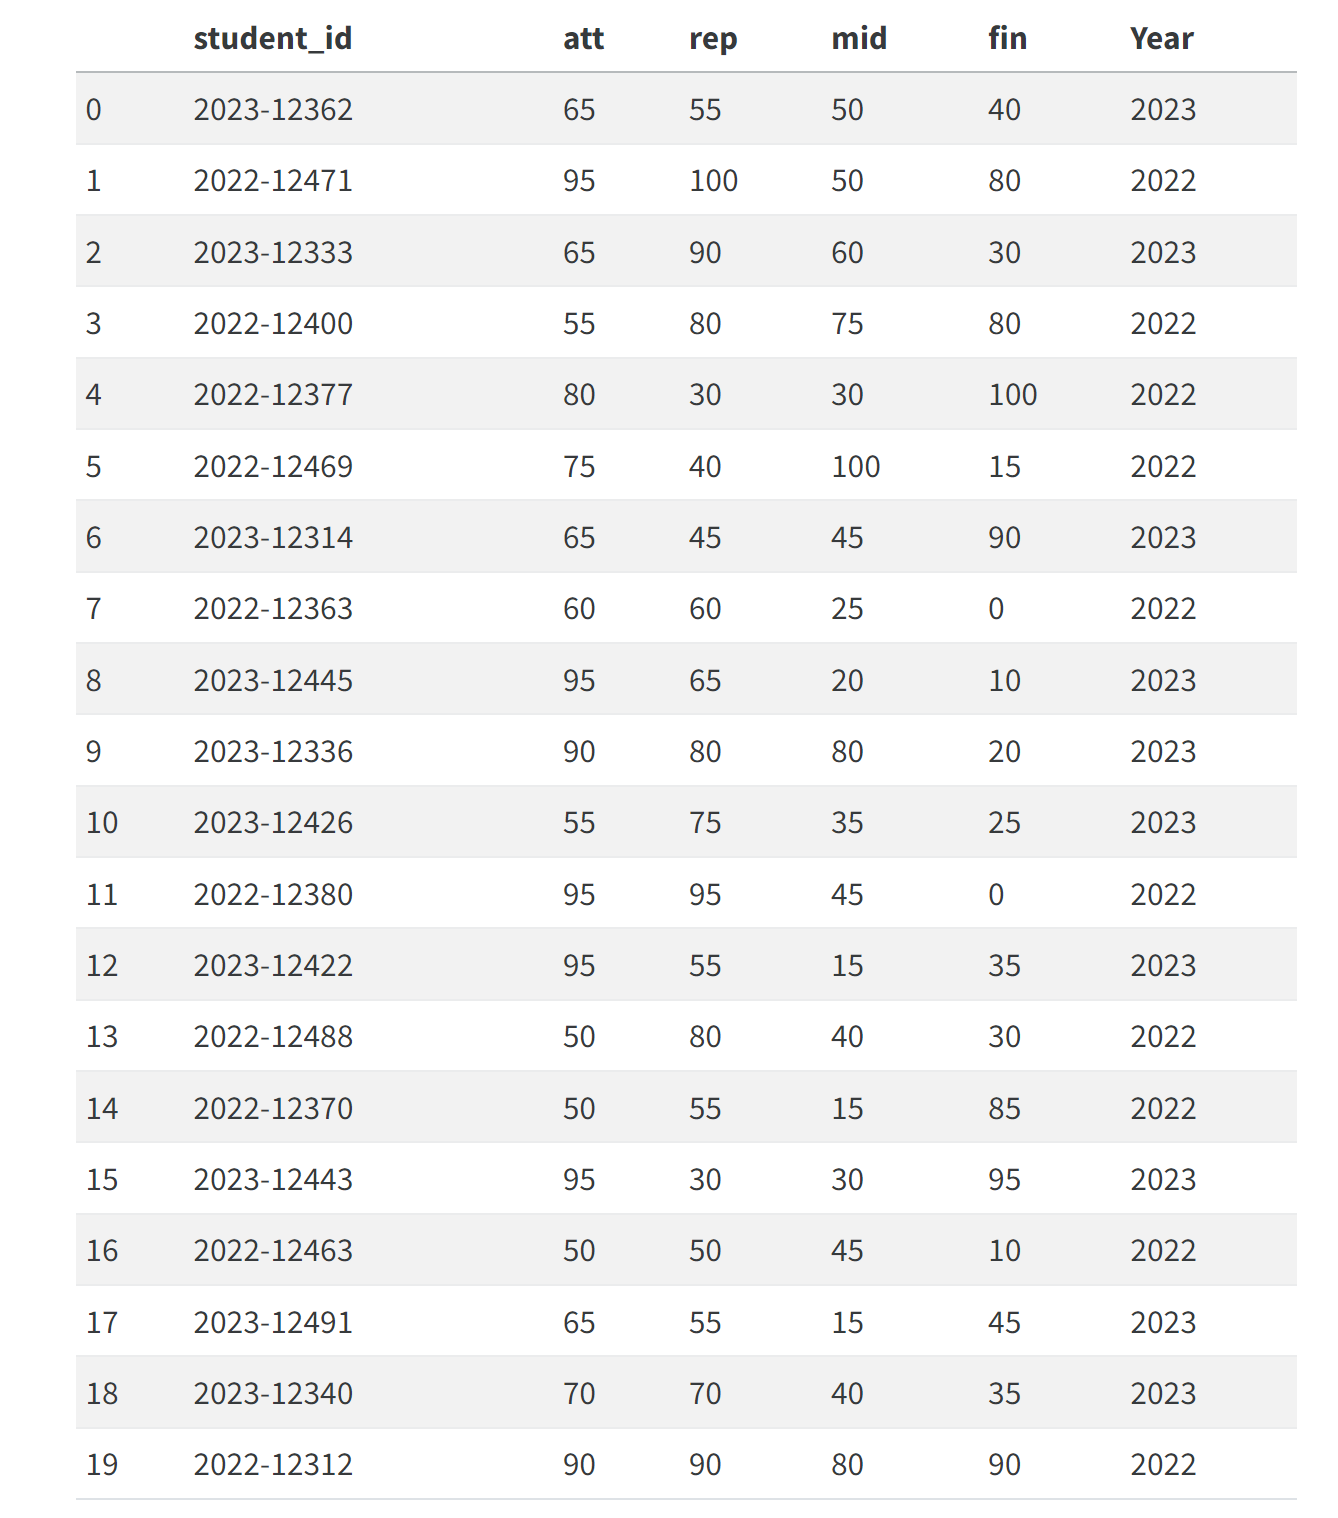](attachment:95eb405b-fc88-41ff-8f56-656f8d4fea9c.png)
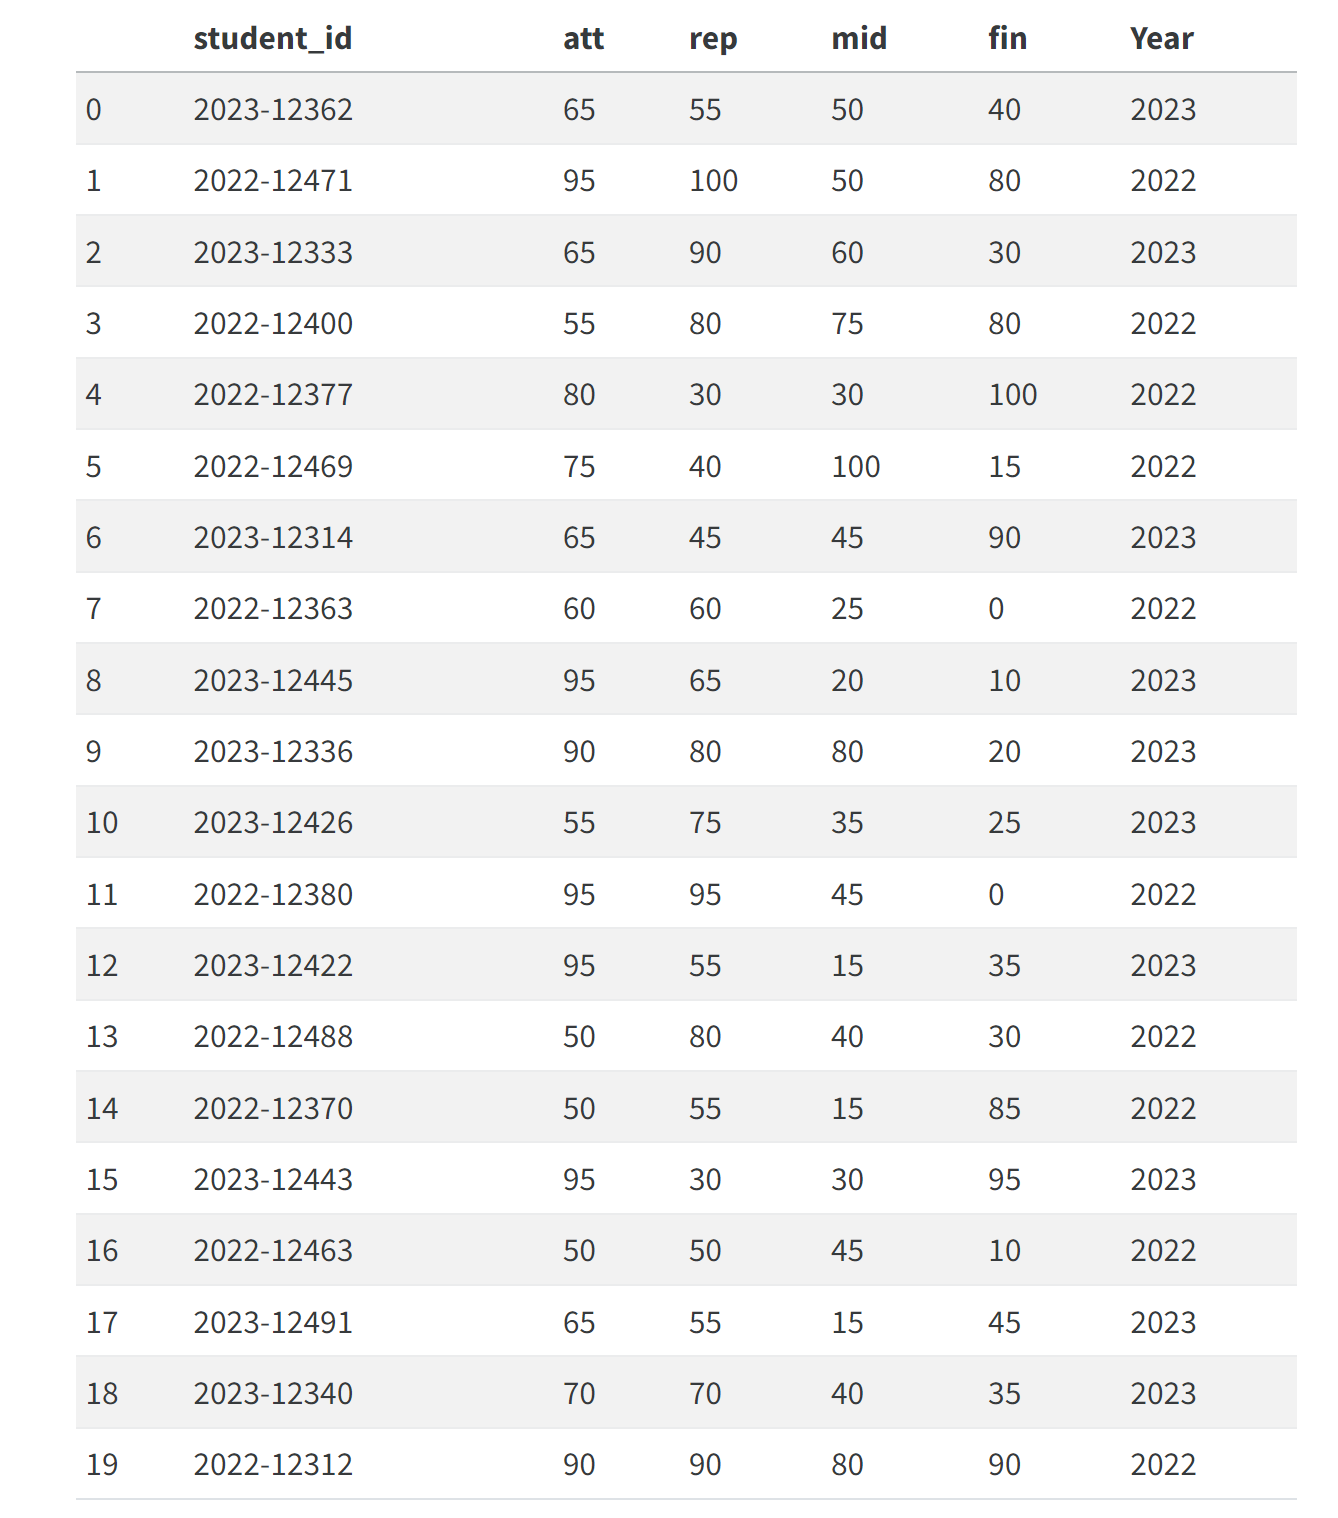

In [325]:
map(lambda x: int(x.split('-')[0]),

<function __main__.<lambda>(x)>

In [336]:
set(dir(df['student_id'])).intersection(set('__abs__'))

set()

In [335]:
dir(df['student_id'])

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__rep